In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(os.getcwd())

D:\Kaggle\Titanic - Machine learning disaster


In [3]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
results = pd.read_csv('datasets/gender_submission.csv')

In [4]:
train_data = train_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]
train_data['Age'].fillna(30,inplace=True)
sex = {'male':0,'female':1}
train_data.Sex = [sex[i] for i in train_data.Sex]
embark = {'S':-1,'C':0,'Q':1}
train_data['Embarked'].fillna('Q',inplace=True)
train_data.Embarked = [embark[i] for i in train_data.Embarked]
train_X = train_data[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
train_y = train_data[['Survived']]

In [5]:
test_data = test_data[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
test_data['Age'].fillna(30,inplace=True)
test_data.Sex = [sex[i] for i in test_data.Sex]
test_data.Embarked = [embark[i] for i in test_data.Embarked]
test_X = test_data

In [6]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,-1
1,1,1,1,38.0,1,0,0
2,1,3,1,26.0,0,0,-1
3,1,1,1,35.0,1,0,-1
4,0,3,0,35.0,0,0,-1


In [7]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,1
1,3,1,47.0,1,0,-1
2,2,0,62.0,0,0,1
3,3,0,27.0,0,0,-1
4,3,1,22.0,1,1,-1


In [8]:
results = results[['Survived']]

In [9]:
X = np.array(train_X)
y = np.array(train_y)
X_test = np.array(test_X)
y_test = np.array(results)

In [10]:
passenger_index = X.shape[0]
bias = np.ones((X.shape[0],1))
bias_test = np.ones((X_test.shape[0],1))

In [11]:
X = np.column_stack((bias,X))
X_test = np.column_stack((bias_test,X_test))
print(X)

[[ 1.  3.  0. ...  1.  0. -1.]
 [ 1.  1.  1. ...  1.  0.  0.]
 [ 1.  3.  1. ...  0.  0. -1.]
 ...
 [ 1.  3.  1. ...  1.  2. -1.]
 [ 1.  1.  0. ...  0.  0.  0.]
 [ 1.  3.  0. ...  0.  0.  1.]]


In [12]:
w = np.zeros((X.shape[1],1))
z = np.dot(X,w)
a = 1/(1+np.exp(-z))
m = X.shape[0]

In [13]:
print(y.shape)
print(a.shape)
print(X.shape)
print(w.shape)


(891, 1)
(891, 1)
(891, 7)
(7, 1)


In [14]:
def CostFunction(a,y,m):
    cost = (-1/m)*(np.dot(y.T,(np.log(a)))+np.dot((1-y).T,np.log(1-a)))
    cost = np.sum(cost)
    return cost
    

In [15]:
iterations = 10000
learning_rate = 0.008



In [16]:
costs = list(())
for i in range(iterations):
    cost = CostFunction(a,y,m)
    if(i%100==0):
        costs.append(cost)
    theta = (1/m)*(np.multiply(a-y,X))
    theta = np.sum(theta,keepdims=True,axis=0)
    theta = theta.T
    w = w - theta*learning_rate
    z = np.dot(X,w)
    a = 1/(1+np.exp(-z))
    


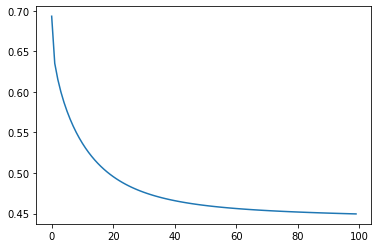

In [17]:
plt.plot(costs)

In [18]:
def predict(x,a):
    predictions = list()
    for i in range(x.shape[0]):
        if a[i][0] > 0.6:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [19]:
predictions = predict(X,a)
error = 0

In [20]:
for i in range(len(predictions)):
    error += abs(predictions[i]-y[i][0])

error = error/(len(predictions))

In [21]:
print("Training Accuracy : ", (1-error)*100)

Training Accuracy :  81.4814814814815


In [22]:
z_test = np.dot(X_test,w)
a_test = 1/(1+np.exp(-z_test))

In [23]:
predict_train = predict(X_test,a_test)
error = 0
for i in range(len(predict_train)):
    error += abs(predict_train[i]-y_test[i][0])

error = error/(len(predictions))
print("Testing Accuracy : ", (1-error)*100)

Testing Accuracy :  97.8675645342312
